In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# # rcParams: (esto es sólo para formatear más lindo los gráficos)
# # axes:
# mpl.rcParams['axes.xmargin'] = 0
# mpl.rcParams['axes.grid'] = True
# mpl.rcParams['axes.grid.axis'] = 'both'
# mpl.rcParams['axes.axisbelow'] = True

# # figure:
# mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 100

# cargo los archivos 
voltajes_prendido_sin_vidrio = pd.read_csv("Mediciones/datos histograma de alturas escala 2mV.csv")*1e3
voltajes_prendido = np.loadtxt('Mediciones/datos histograma 2mV 250 ns vidrio.txt')*1e3
voltajes_apagado= pd.read_csv("Mediciones/datos histograma de alturas laser apagado.csv")*1e3

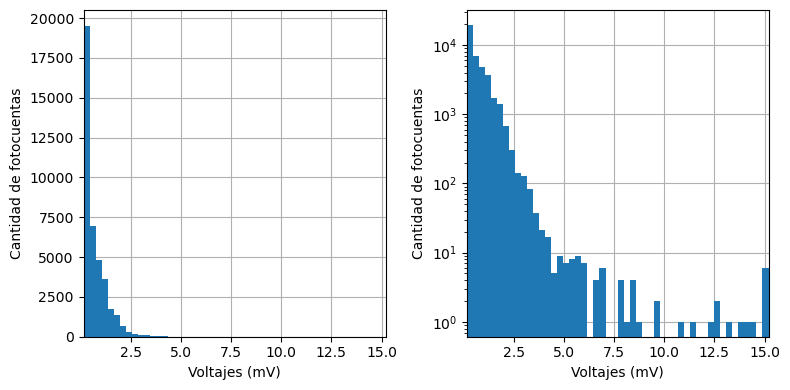

In [8]:
# histogramas de fotocuentas con el láser prendido sin el vidrio con y sin escala logaritmica

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(voltajes_prendido_sin_vidrio, bins=50)
ax1.set_ylabel('Cantidad de fotocuentas')
ax1.set_xlabel('Voltajes (mV)')

ax2.hist(voltajes_prendido_sin_vidrio, bins=50)
ax2.set_ylabel('Cantidad de fotocuentas')
ax2.set_xlabel('Voltajes (mV)')
ax2.set_yscale('log')

# para guardarlos a la carpeta de mi compu
# plt.savefig('Gráficos/histograma de voltajes escala 2mV', dpi=150, format='png')

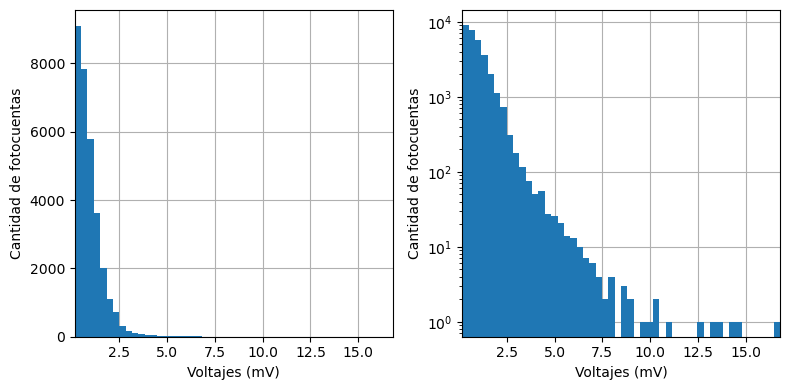

In [9]:
# histogramas de fotocuentas con el láser prendido con el vidrio con y sin escala logaritmica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(voltajes_prendido, bins=50)
ax1.set_ylabel('Cantidad de fotocuentas')
ax1.set_xlabel('Voltajes (mV)')

ax2.hist(voltajes_prendido, bins=50)
ax2.set_ylabel('Cantidad de fotocuentas')
ax2.set_xlabel('Voltajes (mV)')
ax2.set_yscale('log')

# para guardarlos a la carpeta de mi compu
# plt.savefig('Gráficos/histograma laser con vidrio', dpi=150, format='png')

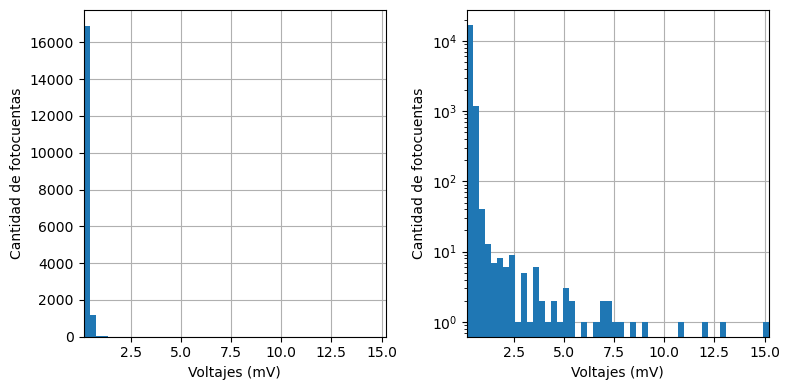

In [10]:
# histogramas de fotocuentas con el láser apagado con y sin escala logaritmica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(voltajes_apagado, bins=50)
ax1.set_ylabel('Cantidad de fotocuentas')
ax1.set_xlabel('Voltajes (mV)')

ax2.hist(voltajes_apagado, bins=50)
ax2.set_ylabel('Cantidad de fotocuentas')
ax2.set_xlabel('Voltajes (mV)')
ax2.set_yscale('log')

# para guardarlos a la carpeta de mi compu
# plt.savefig('Gráficos/histograma laser apagado', dpi=150, format='png')

[ 0.16    0.4928  0.8256  1.1584  1.4912  1.824   2.1568  2.4896  2.8224
  3.1552  3.488   3.8208  4.1536  4.4864  4.8192  5.152   5.4848  5.8176
  6.1504  6.4832  6.816   7.1488  7.4816  7.8144  8.1472  8.48    8.8128
  9.1456  9.4784  9.8112 10.144  10.4768 10.8096 11.1424 11.4752 11.808
 12.1408 12.4736 12.8064 13.1392 13.472  13.8048 14.1376 14.4704 14.8032
 15.136  15.4688 15.8016 16.1344 16.4672 16.8   ]


C:\Users\pauli\AppData\Local\Temp\ipykernel_18952\1356222296.py:24: RuntimeWarning: divide by zero encountered in divide
  proporcion = n_prendido/n_apagado
C:\Users\pauli\AppData\Local\Temp\ipykernel_18952\1356222296.py:24: RuntimeWarning: invalid value encountered in divide
  proporcion = n_prendido/n_apagado
C:\Users\pauli\AppData\Local\Temp\ipykernel_18952\1356222296.py:30: RuntimeWarning: divide by zero encountered in divide
  proporcion = (n_prendido - n_apagado)/n_prendido
C:\Users\pauli\AppData\Local\Temp\ipykernel_18952\1356222296.py:30: RuntimeWarning: invalid value encountered in divide
  proporcion = (n_prendido - n_apagado)/n_prendido
C:\Users\pauli\AppData\Local\Temp\ipykernel_18952\1356222296.py:33: RuntimeWarning: divide by zero encountered in divide
  proporcion = (n_prendido - n_apagado)/n_apagado
C:\Users\pauli\AppData\Local\Temp\ipykernel_18952\1356222296.py:33: RuntimeWarning: invalid value encountered in divide
  proporcion = (n_prendido - n_apagado)/n_apagado
C:\

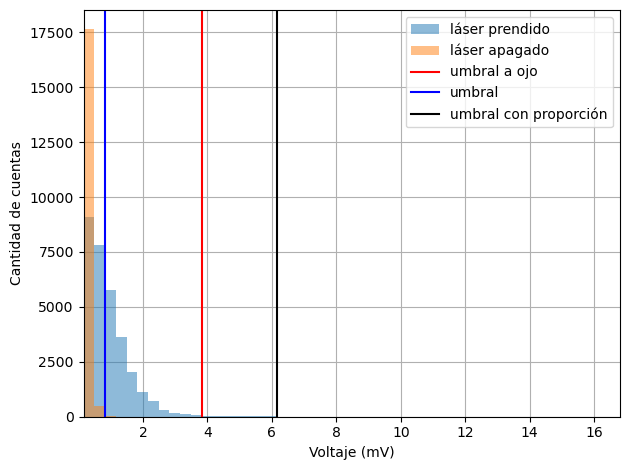

In [14]:
fig, ax = plt.subplots()

# n y bins tienen la cantidad de cuentas por bin y los bordes de los bins respectivamente (los bordes son los mismos para ambos, n no)
n_prendido, bins_prendido, patches_prendido = ax.hist(voltajes_prendido, bins=50, label='láser prendido', alpha=0.5)
n_apagado, bins_apagado, patches_apagadp = ax.hist(voltajes_apagado, bins=bins_prendido, label='láser apagado', alpha=0.5)

# para sacar el umbral a ojo elijo manualmente de la lista bins_prendido el borde de algun bin donde me parezca que está la "depresión" en el histograma
print(bins_prendido)
umbral_manual = 3.8208

ax.set_ylabel('Cantidad de cuentas')
ax.set_xlabel('Voltaje (mV)')
#ax.set_yscale('log')
ax.axvline(umbral_manual, color='r', label='umbral a ojo')
ax.axvline(0.822, color='b', label='umbral')


# genero arrays con la proporcion entre cantidad de fotocuentas con el haz prendido (n_prendido) y con el haz apagado (n_apagado) por cada bin
# probé distintas maneras de ver esa diferencia

# para ver cada una comento todas las demás y dejo que ejecute el código de abajo con esa definicion de proporcion

# proporción dividiendo prendido sobre apagado (se maximiza)
proporcion = n_prendido/n_apagado

# proporción cantidad de cuentas (resta) se maximiza
proporcion = n_prendido - n_apagado

# proporción cantidad de cuentas resta normalizado por la cantidad de fotocuentas con el láser prendido
proporcion = (n_prendido - n_apagado)/n_prendido

# idem con el láser apagado
proporcion = (n_prendido - n_apagado)/n_apagado

# idem con las cuentas totales del bin (sumadas)
proporcion = (n_prendido - n_apagado)/(n_apagado + n_prendido)

# con todas descomentadas grafica el umbral calculado con la última

proporcion_lista = list(proporcion) 
left_edge = proporcion_lista.index(max(proporcion_lista)) # busco en qué posición está el máximo de esa proporción utilizada (corresponde a encontrar para qué bin la proporción es máxima)
# lo nombro left_edge porque uso ese índice sobre la lista de bordes de bins para encontrar el borde izquierdo de ese bin
umbral_proporcion = bins_prendido[left_edge] # encuentro el borde del bin donde la prop es máxima
ax.axvline(umbral_proporcion, color='k', label='umbral con proporción') # lo grafico

ax.legend()